<a href="https://colab.research.google.com/github/iashyam/Computation-QM/blob/main/Numerov's_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerov's Algorithm For finding EigenStates

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

The Equation for Harmonic Potenital is

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2 \psi}{d x^2} + V(x)\psi = E\psi
\end{equation}

### Dimensional Analysis

Putting $ x = \sqrt{\frac{\hbar}{m\omega}}y$ and $\mathcal{E} = \frac{2E}{\hbar\omega}$ We get the dimessionless euqation


Natural lenghth scale = $\sqrt{\frac{\hbar}{m\omega}}$
Natural Energy Scale = $\frac{\hbar \omega}{2}$

\begin{equation}
\frac{d^2  \phi}{dy^2} + k(y)\phi = 0
\end{equation}

Where $$k(y) = \mathcal{E}-y^2$$

### The Algorithm
\begin{equation}
\phi_{n+1} = \frac{1}{1+\frac{h^2}{12}k_{n+1}}\left(2\phi_n\left(1 - \frac{5h^2}{12}k_n\right) - \phi_{n-1}\left(1+\frac{h^2}{12}k_{n-1}\right)\right)
\end{equation}

## When you know the eigenvalue

The we know the eigenvalue to be $e$.

In [ ]:
#the k funciton

n = 0 #nth excited state
e = 2*n+1 #energy of nth excited state

def k(y):
    return e-y**2

#definig the range
y0 = -6
yf = 6

N = 500 #number of lattice point
h = (yf-y0)/N #lattice spacing
# h = 0.01
# N = int((yf-y0)/h)


#intial conditions
phi0 = 0
y1 = y0+h
y2 = y1+h
phi1 = 1e-8 #1x10^-8

#lists to store data
ys = [y0,y1]
phis = [phi0,phi1]

#the algorithm
for step in range(N):
    phi2 = (2*phi1*(1-(5*h**2/12)*k(y1))-phi0*(1+h**2*k(y0)/12))/(1+h**2*k(y2)/12)

    phis.append(phi2)
    ys.append(y2)

    phi0 = phi1
    phi1 = phi2

    y0 = y1
    y1 = y2
    y2 += h

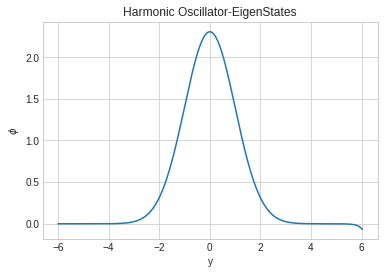

In [ ]:
plt.plot(ys,phis)
plt.xlabel('y')
plt.ylabel(r'$\phi$')
plt.title('Harmonic Oscillator-EigenStates');

In [ ]:
def bisection(f,start,end):
    tol = 1e-4
    max_iter = 100
    count = 0
    if f(start)*f(end)>0:
        return None
    else:
        while count<max_iter and abs(end-start)>tol:
            mid = (start+end)/2
            if f(start)*f(mid)<0:
                end = mid
            else:
                start = mid
        return mid

In [ ]:
def g(x):
    return x**2 -2

bisection(g,0,2)

1.41424560546875

In [ ]:
def eigen_states(n, space): #n: nth eigen state
    e = 2*n+1

    global k

    def k(y):
        return e-y**2

    #definig the range
    y0 = space[0]
    yf = space[1]

    # N = 500 #number of lattice point
    h = (yf-y0)/N

    #intial conditions
    phi0 = 0
    y1 = y0+h
    y2 = y1+h
    phi1 = 1e-8

    #lists to store data
    ys = [y0,y1]
    phis = [phi0,phi1]

    #the algorithm
    for step in range(N):
        phi2 = (2*phi1*(1-(5*h**2/12)*k(y1))-phi0*(1+h**2*k(y0)/12))/(1+h**2*k(y2)/12)

        phis.append(phi2)
        ys.append(y2)

        phi0 = phi1
        phi1 = phi2

        y0 = y1
        y1 = y2
        y2 += h

    return np.array(ys),np.array(phis)

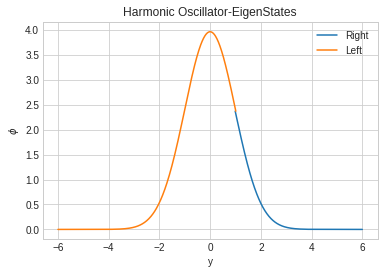

In [ ]:
ys_left, phi_left = eigen_states(0,(-6,1))
ys_right,phi_right = eigen_states(0,(6,1))


#forced match
phi_right = phi_right*phi_left[-1]/phi_right[-1]

plt.plot(ys_right,phi_right,label='Right')
plt.plot(ys_left,phi_left,label='Left')
plt.xlabel('y')
plt.ylabel(r'$\phi$')
plt.legend();
plt.title('Harmonic Oscillator-EigenStates');

## When Eigen Values are unknown

In [ ]:
def eigen_states2(e,space):

    def k(x):
        return e-x*x

    y0 = space[0]
    yf = space[1]

    # N = 1000
    global dy
    dy = 0.01 #h

    if y0>yf:
        dy *= -1

    ys = np.arange(y0,yf,dy)
    N = len(ys)
    # print(N)
    ks = k(ys)
    phis= np.zeros(N)
    phis[1] = 1e-8

    for n in range(1,N-1):
        phis[n+1] = (1/(1+dy**2*ks[n+1]/12))*(2*phis[n]*(1-5*dy**2*ks[n]/12)-phis[n-1]*(1+dy**2*ks[n-1]/12))

    return ys,phis


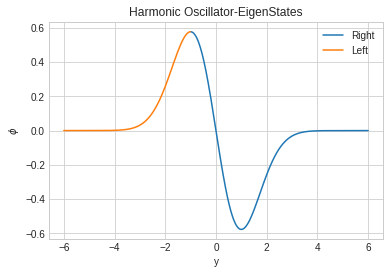

In [ ]:
e = 3
tp = bisection(k,-6,0)

ys_left, phi_left = eigen_states2(3,(-6,tp))
ys_right,phi_right = eigen_states2(3,(6,tp))

#forced match
phi_right = phi_right*phi_left[-1]/phi_right[-1]

plt.plot(ys_right,phi_right,label='Right')
plt.plot(ys_left,phi_left,label='Left')
plt.xlabel('y')
plt.ylabel(r'$\phi$')
plt.legend();
plt.title('Harmonic Oscillator-EigenStates');

### Calculating the eigen values

If we give the function any wrong eigen value, we see a little kink there in the graph showing that the first derivative is not continioues at turning point, so we can use this to find the right eigen value. 

We need to find a value of e such that the first derivative from both sides is zero ie this function is zero.

\begin{equation}
f(e) = \frac{\phi_R(t_p-h)-\phi_L(t_p-h)}{\phi_L(t_p)}
\end{equation}

Where $t_p$ is the turning point.

In [ ]:
def f(e):
    def k(x):
        return e-x**2

    tp = bisection(k,0,6)

    ys_left, phi_left = eigen_states2(e,(-6,tp))
    ys_right,phi_right = eigen_states2(e,(6,tp-dy))

    #forced match
    phi_right = phi_right*phi_left[-1]/phi_right[-2]
    
    return (phi_right[-1]-phi_left[-2])/phi_left[-1]


In [ ]:
def change_sign(f,shyam):
    ds = 0.01
    s = shyam+ds
    max_iter = 1000
    iter = 0
    while f(s)*f(shyam)>=0 and iter<max_iter:
        s = s+ds
    return s

In [ ]:
Es = []
dE = 0.1
k1 = dE
k2 = change_sign(f,dE)
for _ in range(10):
    E = bisection(f,k1,k2)
    if abs(f(E))<0.01:
        Es.append(E)
    k1 = k2
    k2 = change_sign(f,k1+dE)
Es

[1.0020574951171881,
 3.0022491455077924,
 5.002451782226504,
 7.002508239745997,
 9.002553100585802]

In [ ]:
f( 1.345351562500001)

-1.7666457754179403

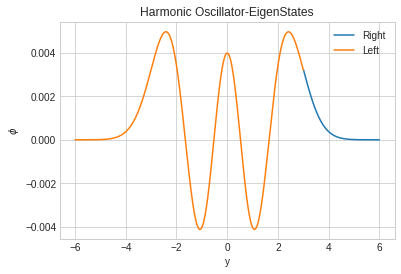

In [ ]:
e = Es[4]

def k(x):
    return e-x**2

tp = bisection(k,0,6)

ys_left, phi_left = eigen_states2(e,(-6,tp))
ys_right,phi_right = eigen_states2(e,(6,tp))

#forced match
phi_right = phi_right*phi_left[-1]/phi_right[-1]

plt.plot(ys_right,phi_right,label='Right')
plt.plot(ys_left,phi_left,label='Left')
plt.xlabel('y')
plt.ylabel(r'$\phi$')
plt.legend();
plt.title('Harmonic Oscillator-EigenStates');

# Radial Wave Function for Hydrogen Atom


\begin{equation}
-\frac{\hbar^2}{2\mu}\frac{d^2u}{dr^2} + \left(-\frac{e^2}{4\pi \epsilon_0 r}+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2}\right)u = Eu
\end{equation}

or 

\begin{equation}
-\frac{\hbar^2}{2\mu}\frac{d^2u}{dr^2} + \left(-\frac{e^2}{4\pi\epsilon_0 r}+\frac{\hbar^2}{2\mu}\frac{l(l+1)}{r^2} -E\right)u = 0
\end{equation}

Let $E = \frac{E_0}{n^2}$ where $E_0$ is the _Ground State energy_ and $n$ is prinicpal quantum number.

Quantity $\frac{h^2}{2m}$ has dimessions of $Jm^2$ and $\frac{e^2}{4\pi\epsilon_0}$ has dimensions of $Jm$, so if we devide these two we should get our natural length salce

$$a = \frac{2\pi\epsilon_0 \hbar^2}{\mu e^2}$$

let $r = \rho a$ and substituting this in the equations we get

\begin{equation}
-\frac{\hbar^2}{2\mu a^2}\frac{d^2u}{d\rho^2} + \left(-\frac{e^2}{4\pi\epsilon_0 a}
\frac{1}{\rho}+\frac{\hbar^2}{2\mu a^2}\frac{l(l+1)}{\rho^2} -E\right)u = 0
\end{equation}

Deviding the equation by $-\frac{h^2}{2\mu a^2}$

\begin{equation}
\frac{d^2u}{d\rho^2} + \left(\frac{e^2}{4\pi\epsilon_0 }\frac{2\mu a}{\hbar^2}
\frac{1}{\rho}-\frac{l(l+1)}{\rho^2} +\frac{E}{\hbar^2/2\mu a}\right)u = 0
\end{equation}

> \begin{equation}
\frac{d^2u}{d\rho^2} + \left(
\frac{1}{\rho}-\frac{l(l+1)}{\rho^2} + \mathcal{E}\right)u = 0
\end{equation}

Where $\mathcal{E} = \frac{E}{2\mu a^2/\hbar^2}$ is dimessionless energy

let $k(\rho,l) = \frac{1}{\rho}-\frac{l(l+1)}{\rho^2} + \mathcal{E}$

\begin{equation}
\frac{d^2u}{d\rho^2} + ku = 0
\end{equation}

In [ ]:
h = 1.05e-34
mu = 9.1e-31
e = 1.6e-19
E0 = -13.6*e
epsilon = 8.85e-12
a = 2*math.pi*epsilon*h**2/(mu*e**2)
e0 = E0*2*mu*a**2/h**2

In [ ]:
rho_0 = 1
def k(rho,l,e):
    return 1/rho - l*(l+1)/rho**2 + e

In [ ]:
def R(e,l):
        
    #definging the space
    rho0 = 0.01
    rho_f = 18
    h = 0.01

    rhos = np.arange(rho0,rho_f,h)
    # print(rhos)
    N = len(rhos) #number of steps
    ks  = np.array([k(i,e,l) for i in rhos])

    us = np.zeros(N)
    us[0] = 0
    us[1] = 0.01

    # print(ks)

    for n in range(1,N-1):
        us[n+1] = (1/(1+h**2*ks[n+1]/12))*(2*us[n]*(1-5*h**2*ks[n]/12)-us[n-1]*(1+h**2*ks[n-1]/12))

    return rhos, us/rhos

Let's Assume we know the eigen values

$$\mathcal{E}_n = \frac{\mathcal{E}_0}{n^2}$$

Where $\mathcal{E}_0$ is the ground state energy

In [ ]:
def Rnl(n,l):
    e = e0/n**2

    return R(e,l)

Text(0.5, 0, '$\\rho$')

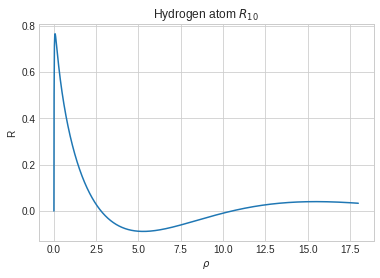

In [ ]:
x,y = Rnl(1,0)
plt.plot(x,y);
plt.title(r'Hydrogen atom $R_{10}$')
plt.ylabel('R')
plt.xlabel(r'$\rho$')

In [ ]:
def kw(l,e):
    def f(rho):

        return 1/rho - l*(l+1)/rho**2 + e
    return f


In [ ]:
e = e0
l = 0
ke0 = kw(l,e)
tp = bisection(ke0,0.01,change_sign(ke0,0.01))

In [ ]:
def R(e,l,space):
        
    #definging the space
    rho0 = space[0]
    rho_f = space[1]
    h = 0.01

    if rho0>rho_f:
        h = -h

    rhos = np.arange(rho0,rho_f,h)
    # print(rhos)
    N = len(rhos) #number of steps
    ks  = np.array([k(i,e,l) for i in rhos])

    us = np.zeros(N)
    us[0] = 0
    us[1] = 0.01

    # print(ks)

    for n in range(1,N-1):
        us[n+1] = (1/(1+h**2*ks[n+1]/12))*(2*us[n]*(1-5*h**2*ks[n]/12)-us[n-1]*(1+h**2*ks[n-1]/12))

    return rhos, us/rhos

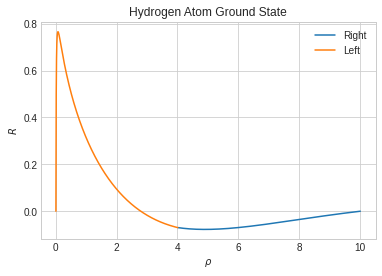

In [ ]:
rho_left, phi_left = R(e,l,(0.01,tp))
rho_right,phi_right = R(e,l,(10,tp))

#forced match
phi_right = phi_right*phi_left[-1]/phi_right[-1]

plt.plot(rho_right,phi_right,label='Right')
plt.plot(rho_left,phi_left,label='Left')
plt.xlabel(r'$\rho$')
plt.ylabel(r'$R$')
plt.legend();
plt.title('Hydrogen Atom Ground State');